# Documentation by example for `shap.plots.scatter`

This notebook is designed to demonstrate (and so document) how to use the `shap.plots.scatter` function. It uses an XGBoost model trained on the classic UCI adult income dataset (which is a classification task to predict if people made over 50k in the 90s).

In [4]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X[:5000])

In [12]:
X_display,y = shap.datasets.adult(display=True)

## Simple dependence scatter plot

A dependence scatter plot shows the effect a single feature has on the predictions made by the model. In this example the log-odds of making over 50k increases significantly between age 20 and 40.

- Each dot is a single prediction (row) from the dataset.
- The x-axis is the value of the feature (from the X matrix, stored in shap_values.data).
- The y-axis is the SHAP value for that feature (shap_values.values), which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model the units are log-odds of making over 50k annually.

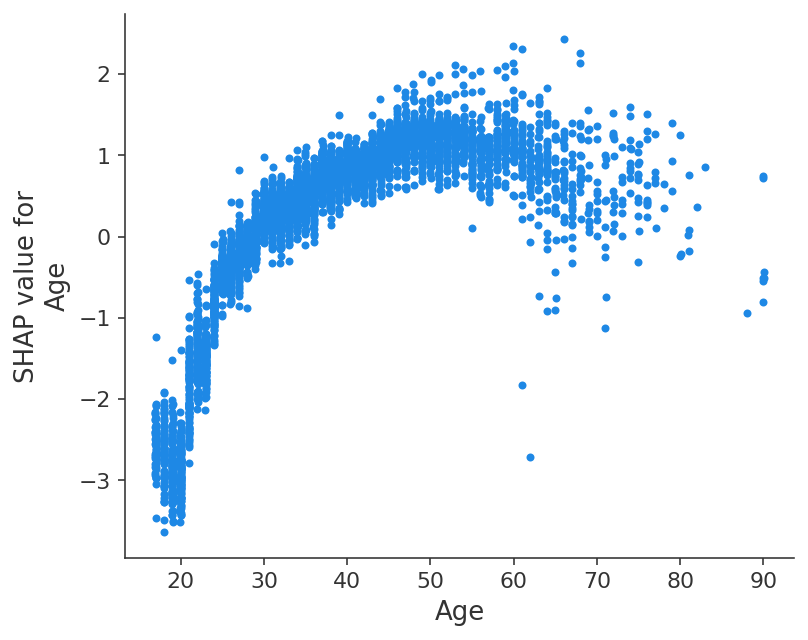

In [5]:
# Note that we are slicing off the column of the shap_values Explanation corresponding to "Age"
shap.plots.scatter(shap_values[:,"Age"])

## Using color to highlight interaction effects

The vertical dispersion in the plot above shows that the same value for the Age feature can have a different impact on the model's output for different people. This means there are non-linear interaction effects in the model between Age and other features (otherwise the scatter plot would perfectly follow the line given by shap.plots.partial_dependence).

To show which feature may be driving these interaction effects we can color our Age dependence scatter plot by another feature. If we pass the entire Explanation object to the color parameter then the scatter plot attempts to pick out the feature with the strongest interaction with Age. If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring. For the example below 20-year-olds with a high level of education are less likely make over 50k than 20-year-olds with a low level of education. This suggests an interaction effect between Education-Num and Age.

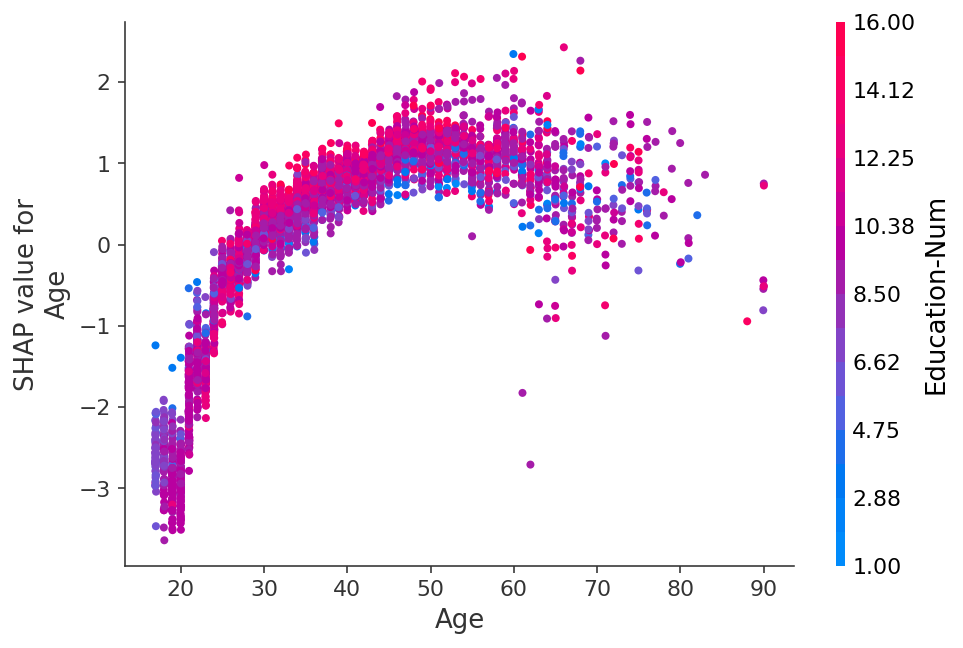

In [6]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

In [18]:
X_display

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [21]:
X_display[:5000]["Workclass"]

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
              ...        
4995              Private
4996              Private
4997         Self-emp-inc
4998              Private
4999            Local-gov
Name: Workclass, Length: 5000, dtype: category
Categories (9, object): [?, Federal-gov, Local-gov, Never-worked, ..., Self-emp-inc, Self-emp-not-inc, State-gov, Without-pay]

ValueError: Can only tuple-index with a MultiIndex

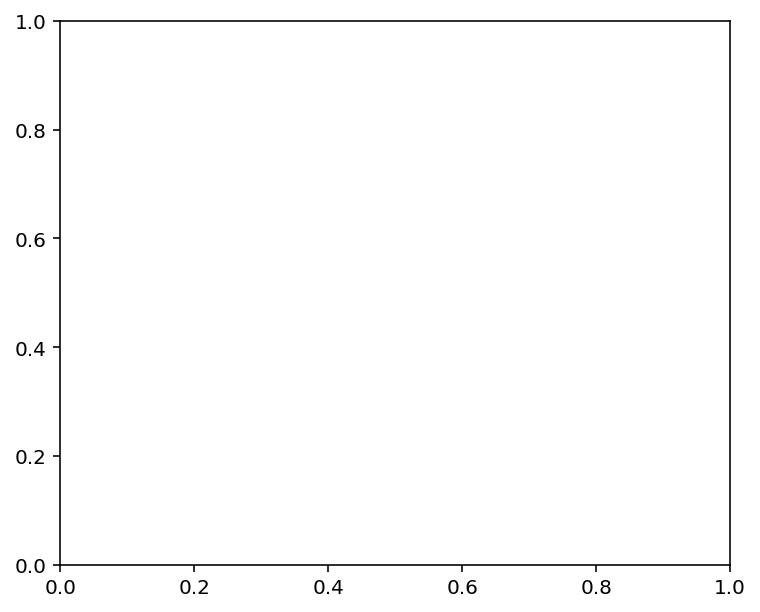

In [22]:
shap.plots.scatter(shap_values[:, "Workclass"], X_display[:5000]["Workclass"])

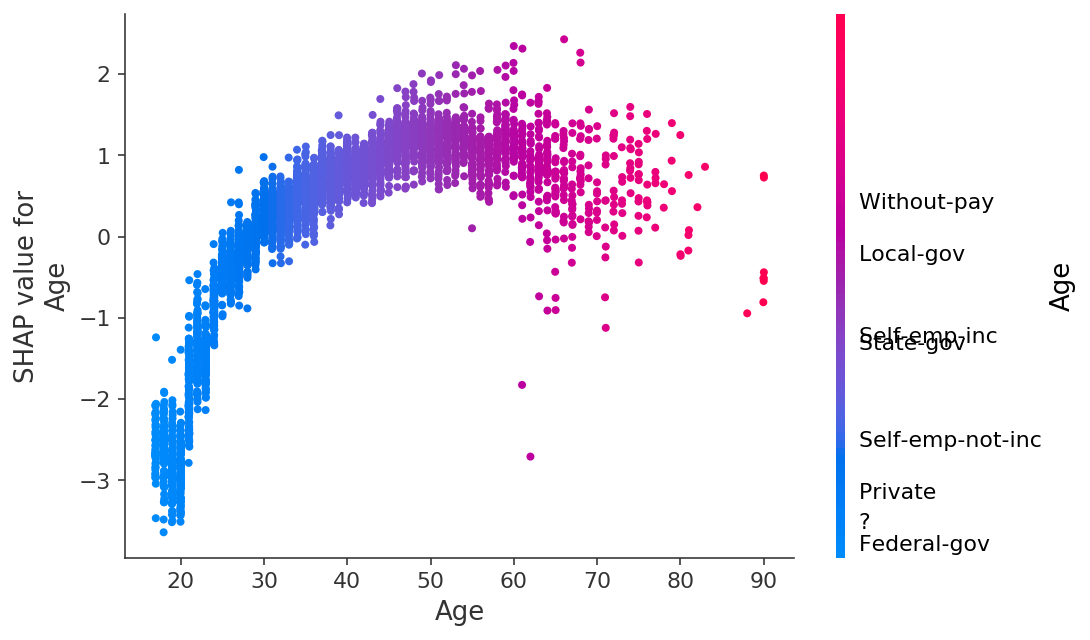

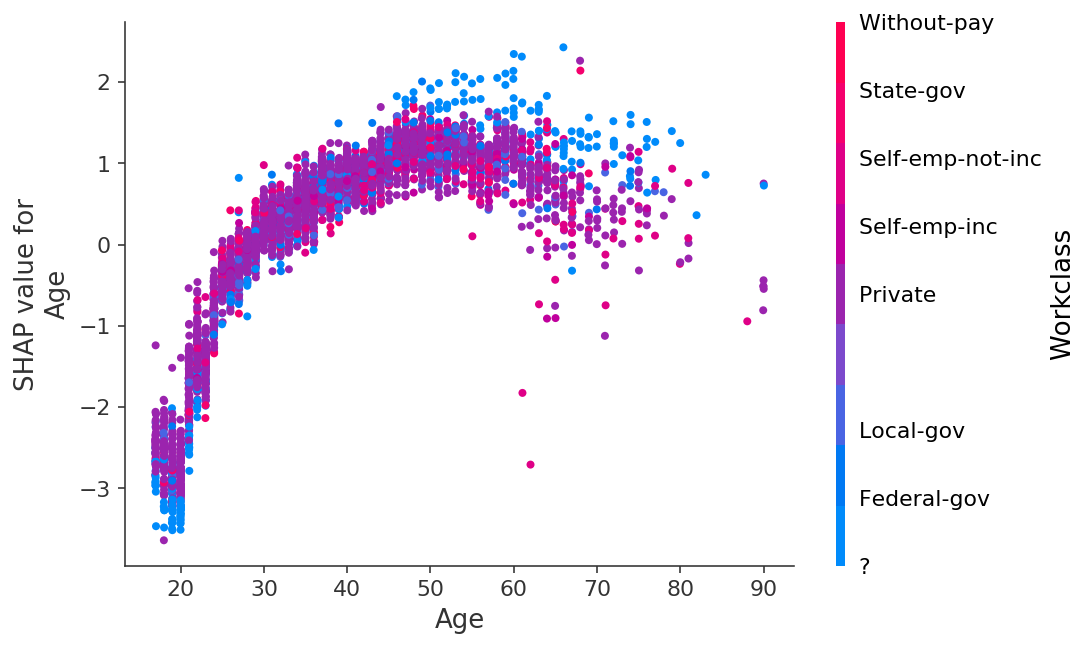

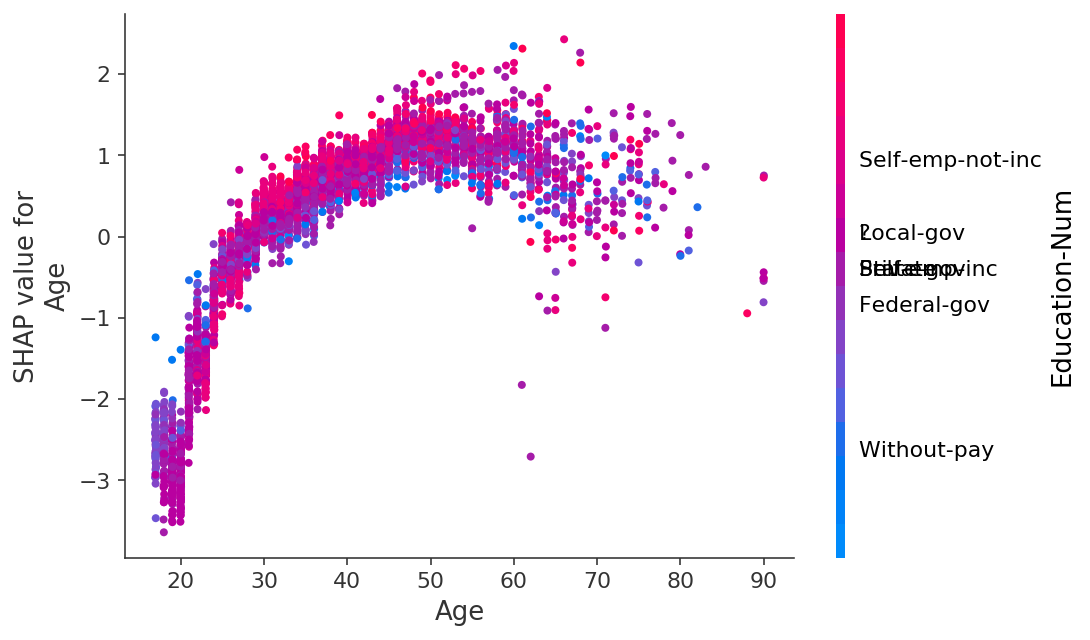

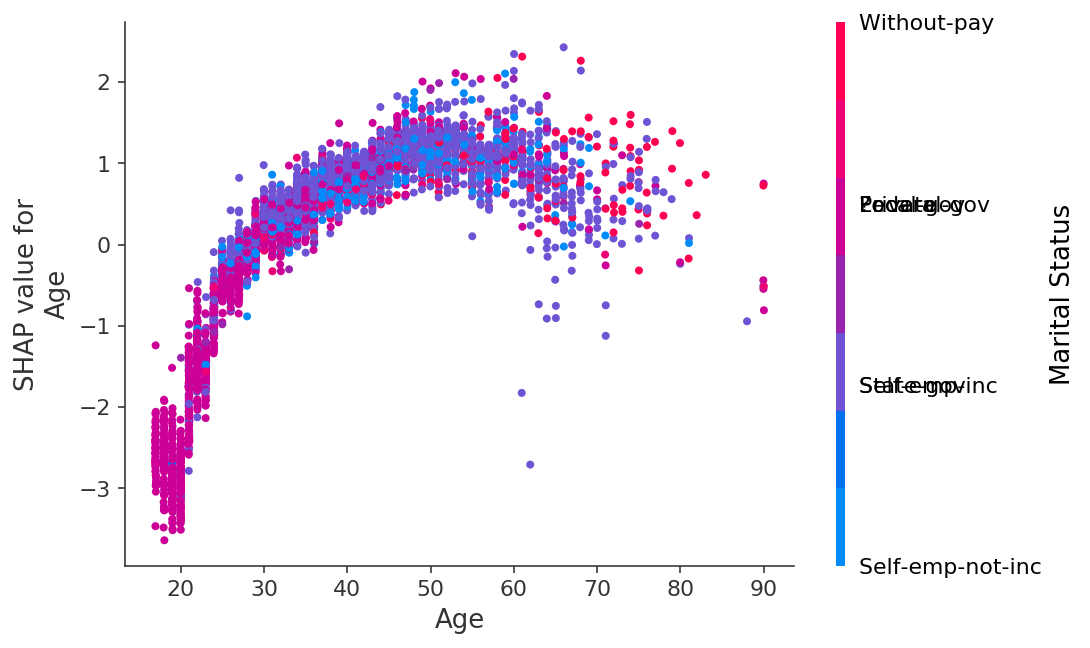

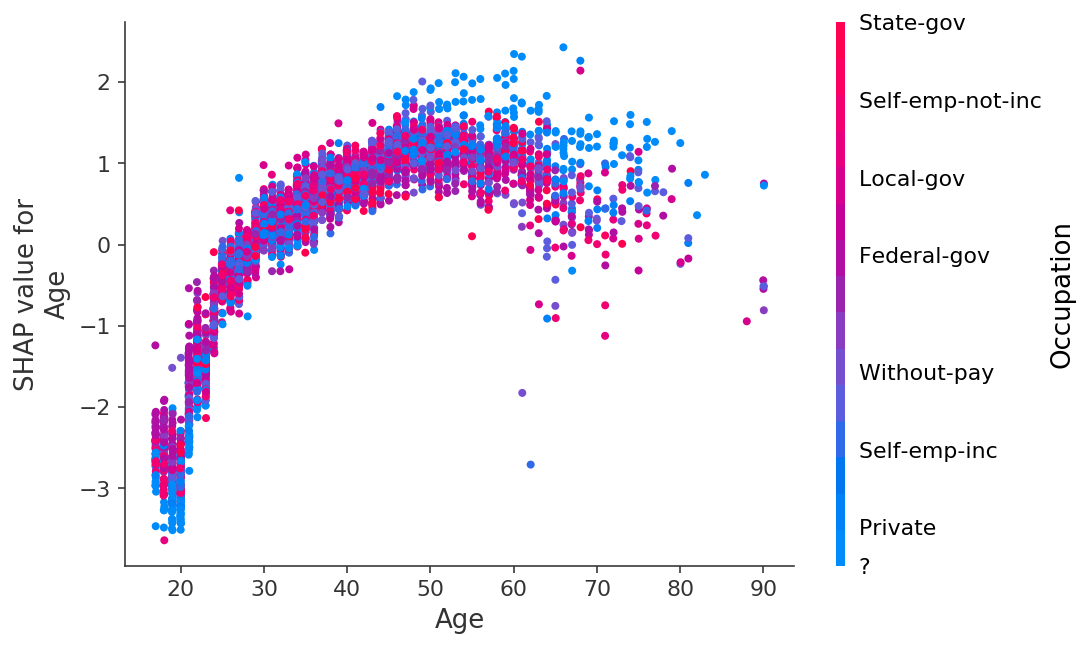

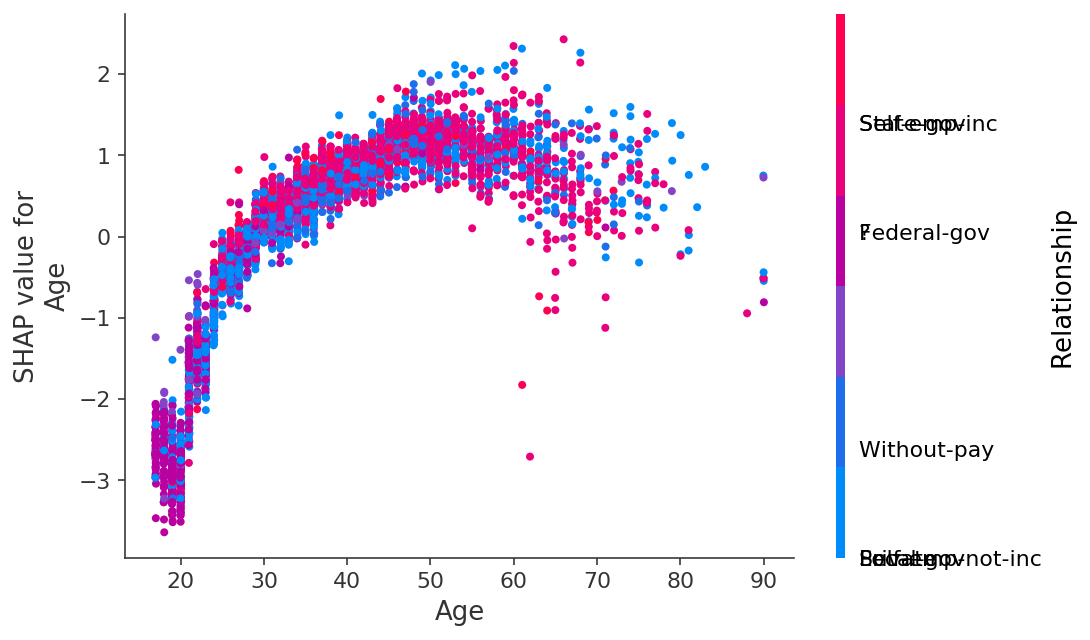

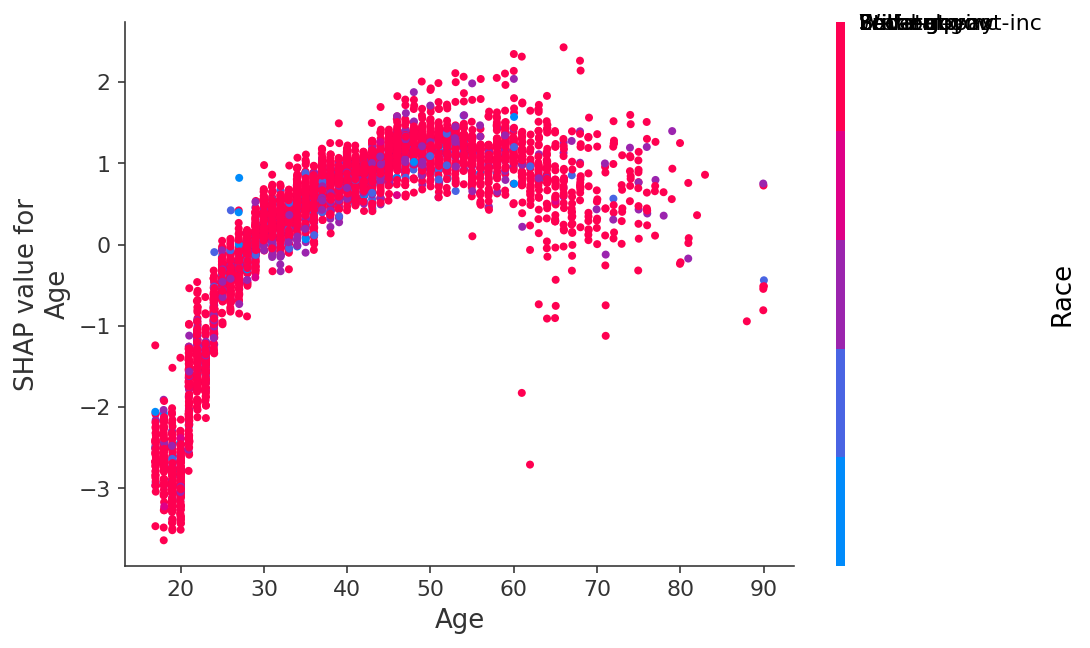

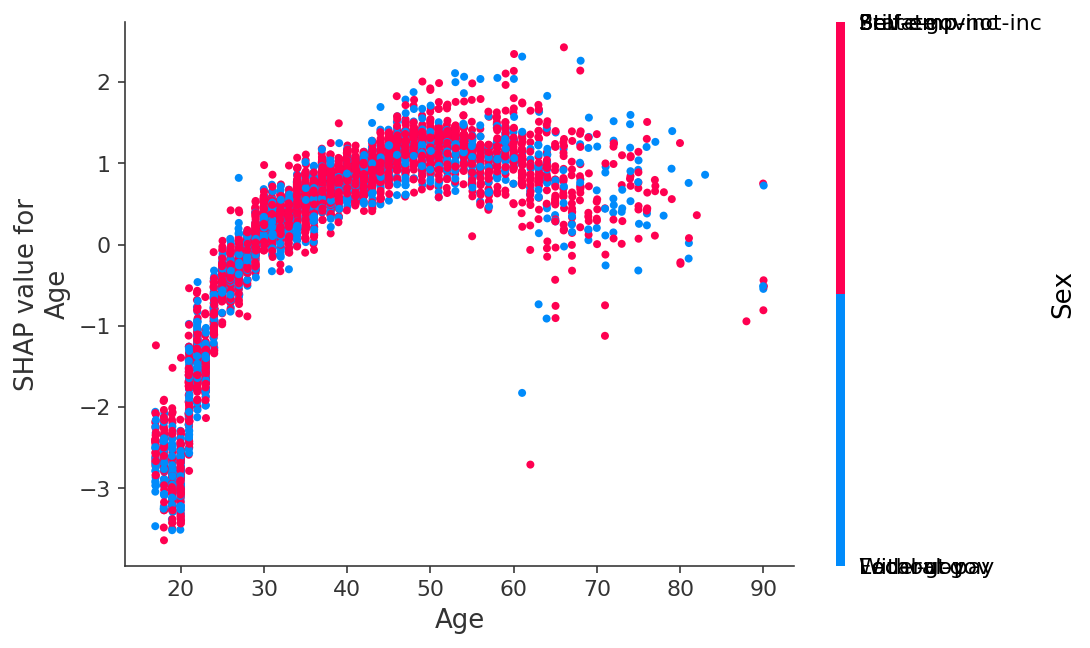

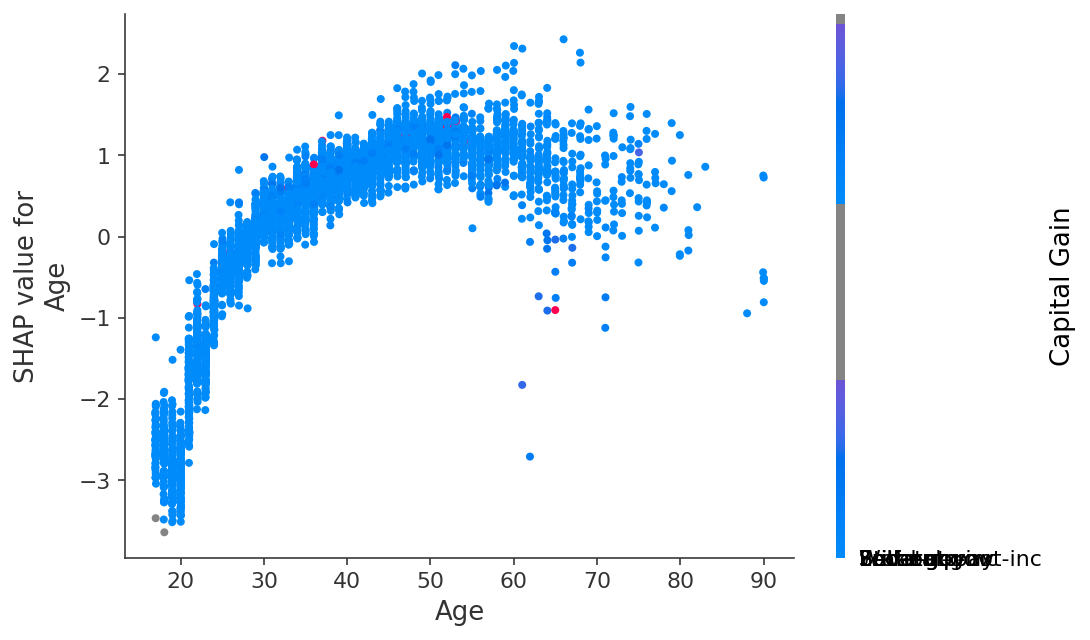

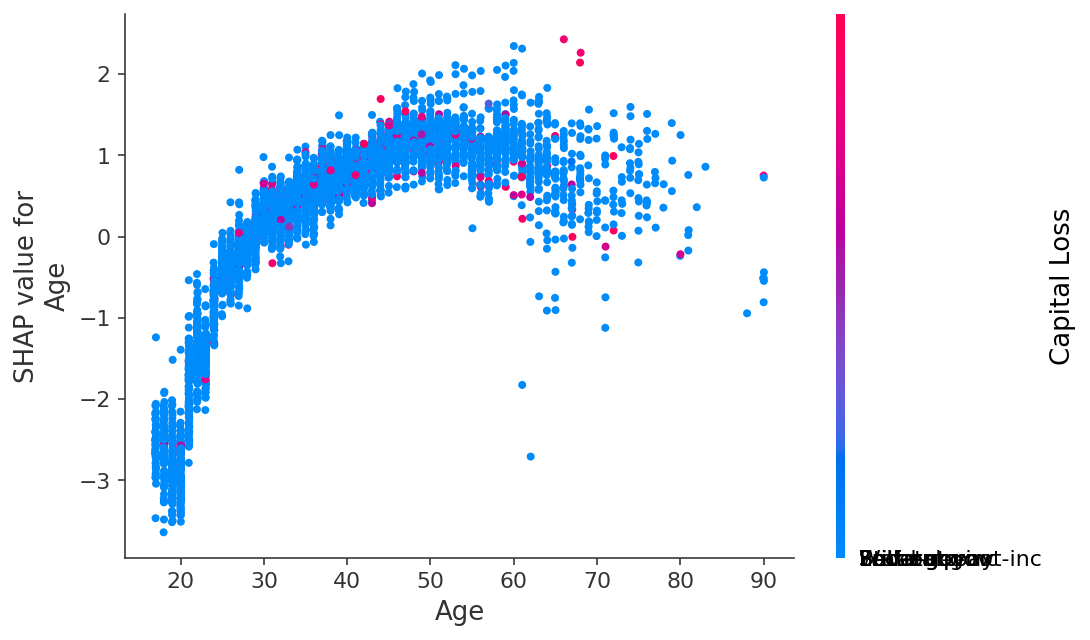

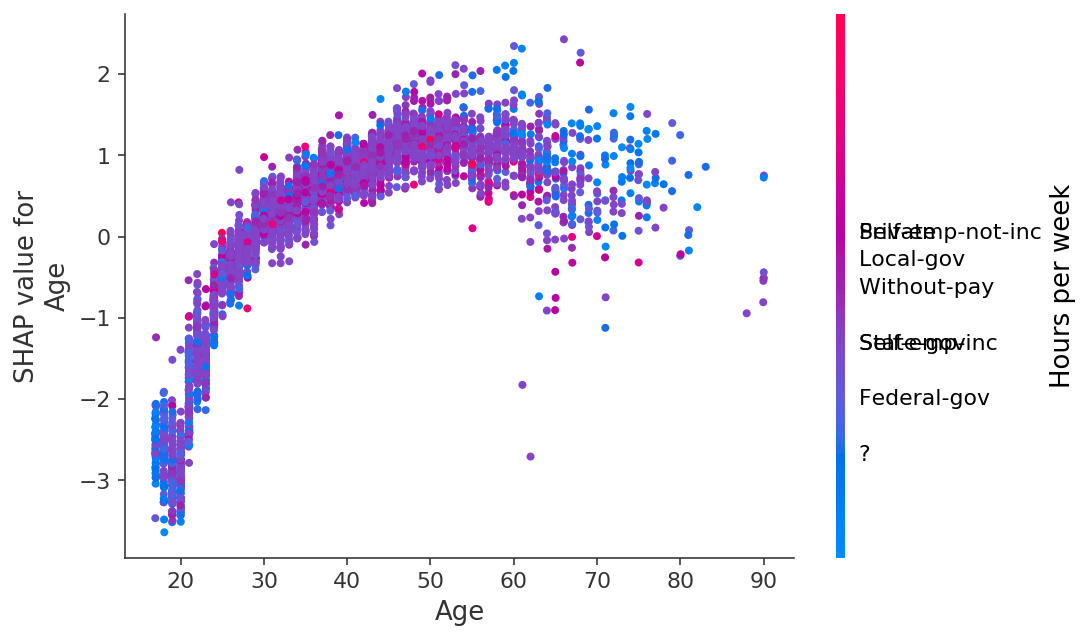

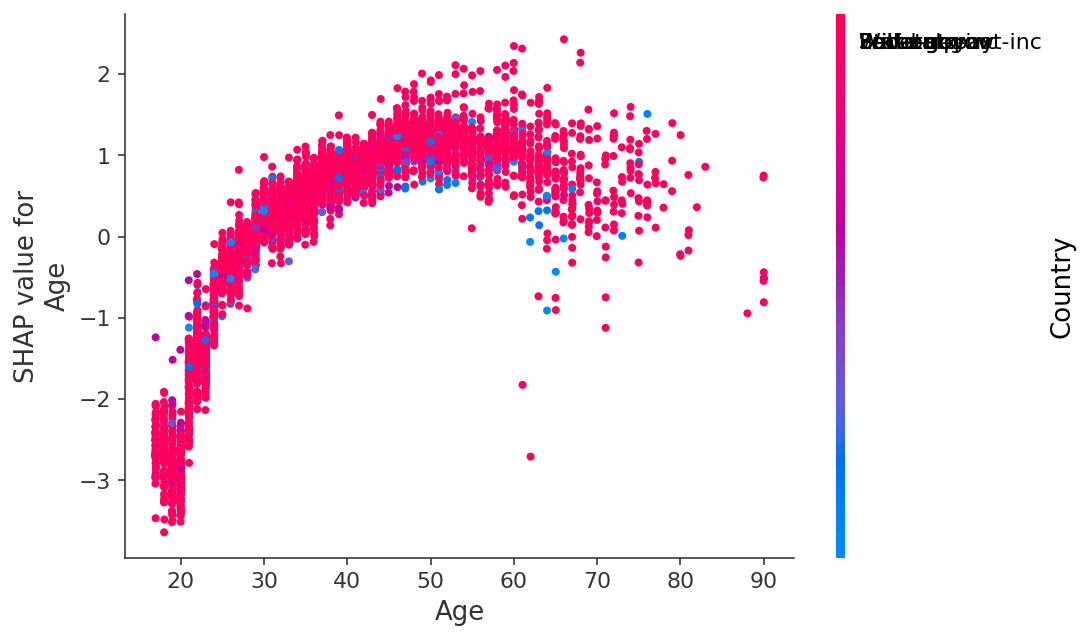

In [13]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
for i in range(12):
    shap.plots.scatter(shap_values[:, "Age"], X_display[:5000], color=shap_values[:,i])

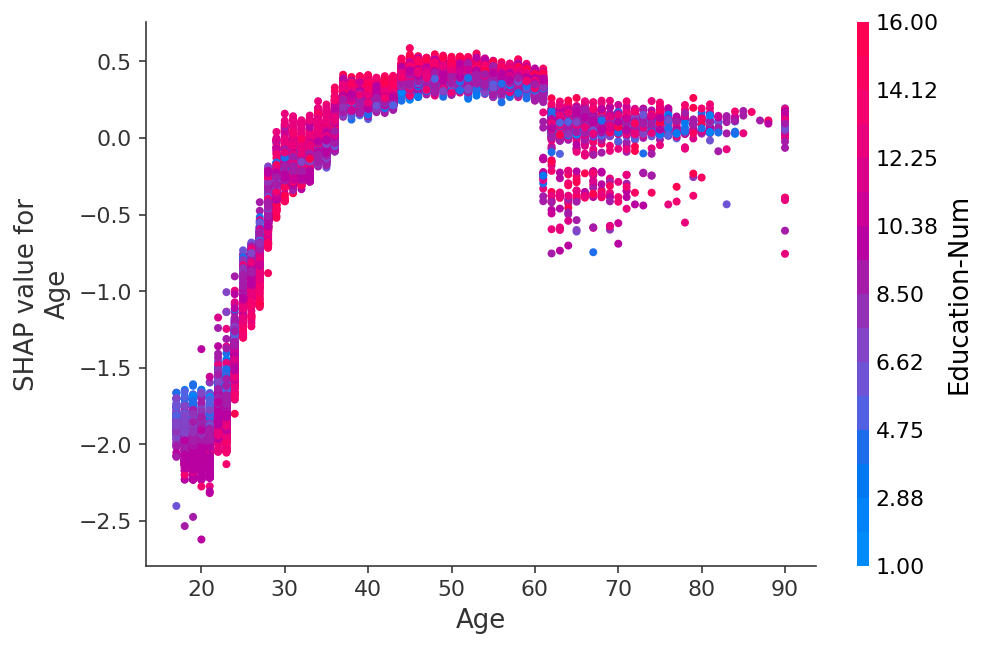

In [5]:
# We can pass a feature name instead of an index
shap.dependence_plot("Age", shap_values, X)

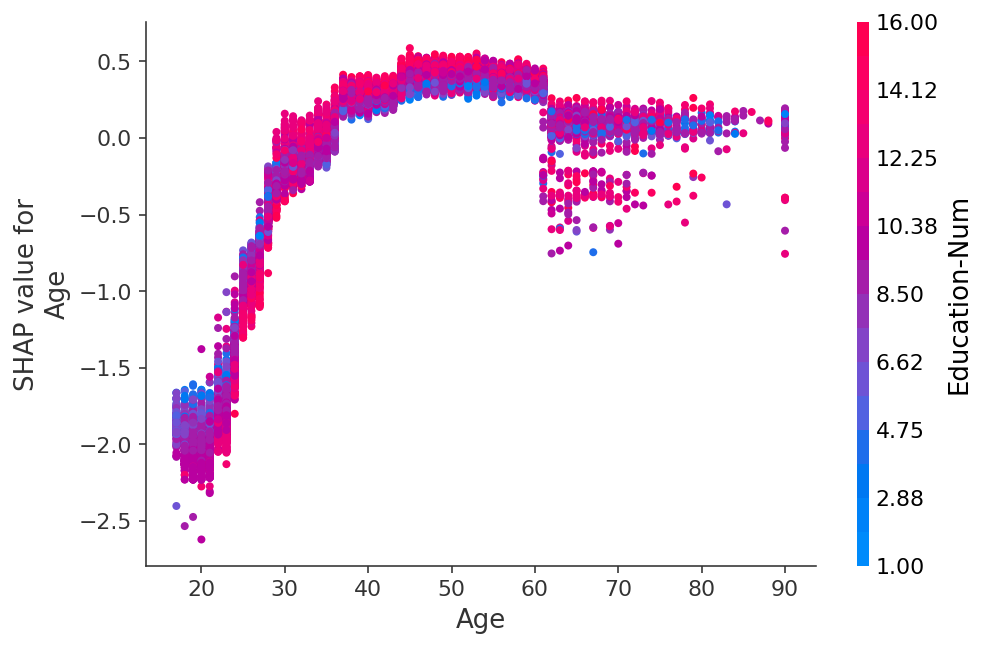

In [6]:
# We can also use the special "rank(i)" systax to specify the i'th most
# important feature to the model. As measured by: np.abs(shap_values).mean(0)
# In this example age is the second most important feature.
shap.dependence_plot("rank(1)", shap_values, X)

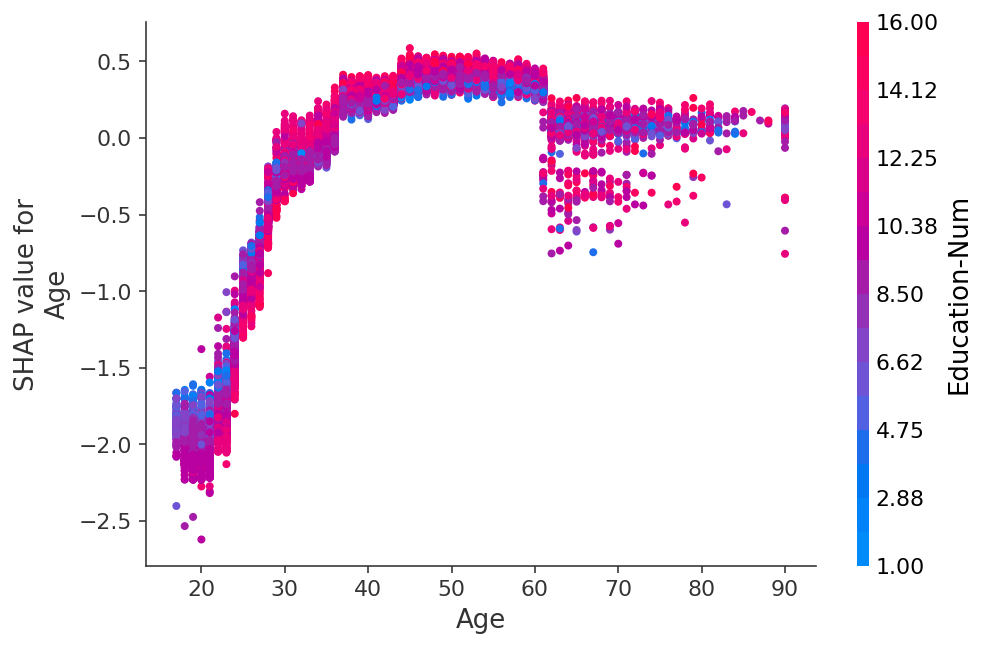

In [7]:
# The interaction_index argument can be used to explicitly
# set which feature gets used for coloring
shap.dependence_plot("rank(1)", shap_values, X, interaction_index="Education-Num")

## Exploring different interaction colorings

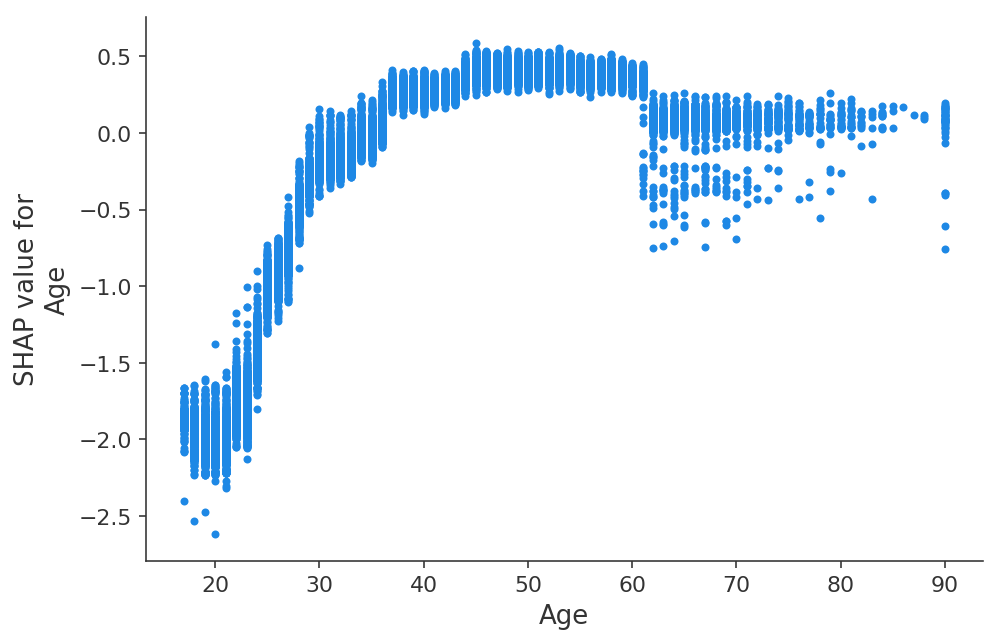

In [8]:
# we can turn off interaction coloring
shap.dependence_plot("Age", shap_values, X, interaction_index=None)

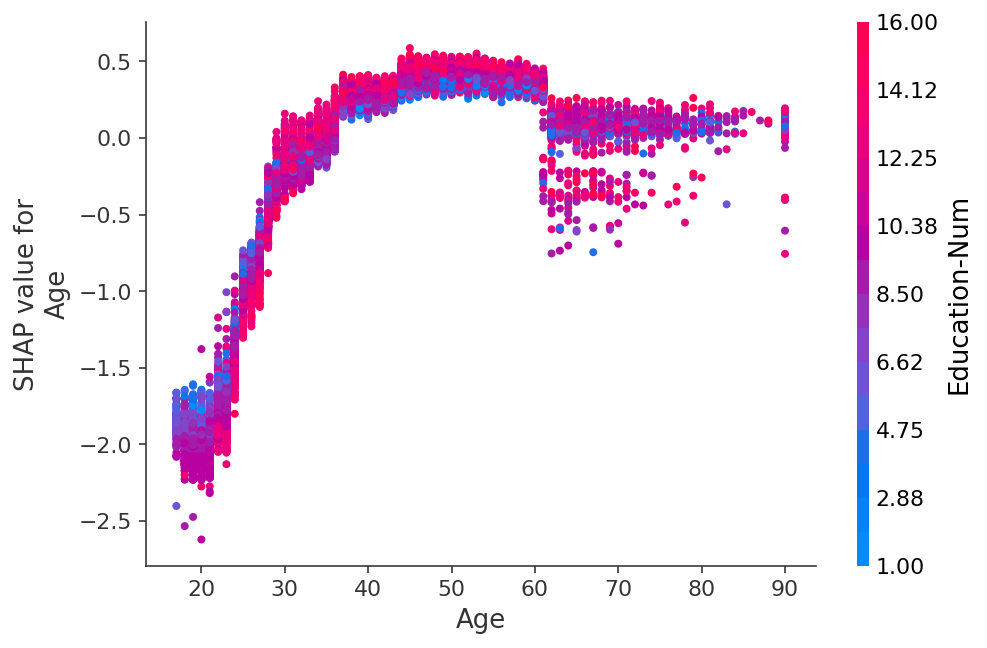

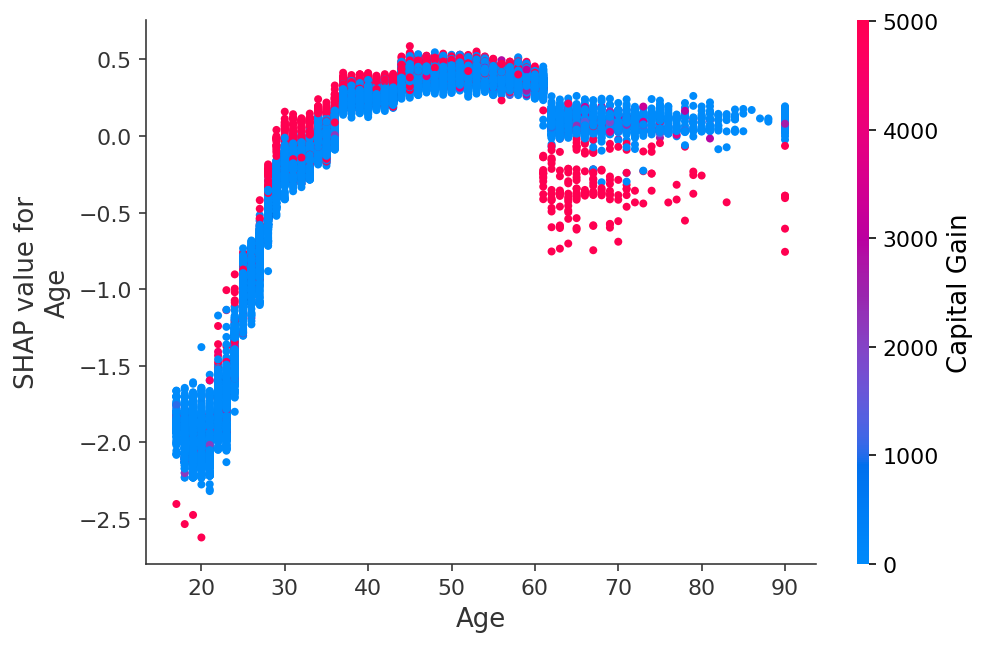

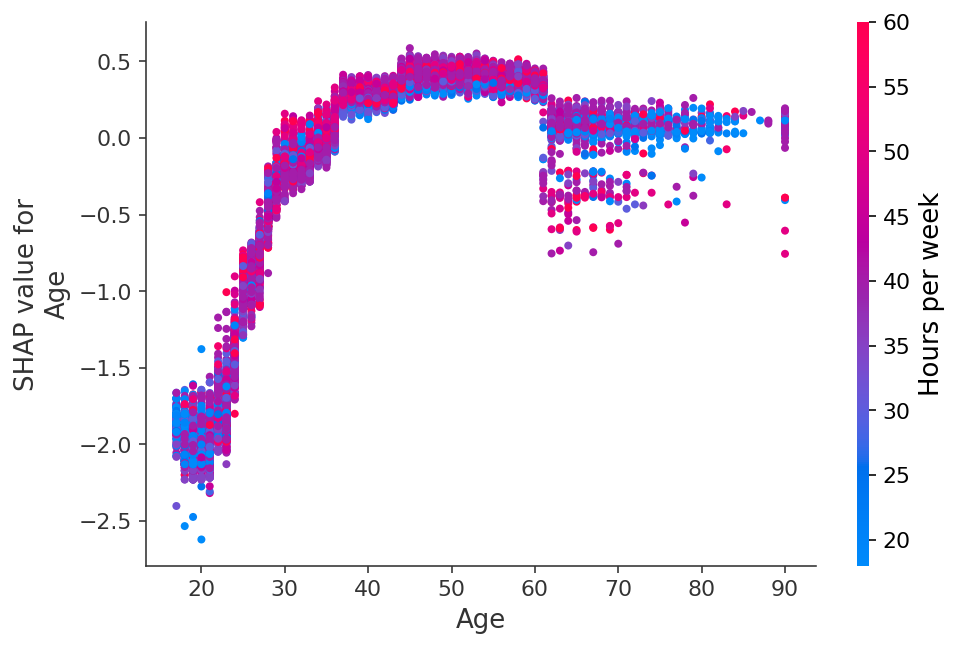

In [9]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions("Age", shap_values, X)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("Age", shap_values, X, interaction_index=inds[i])

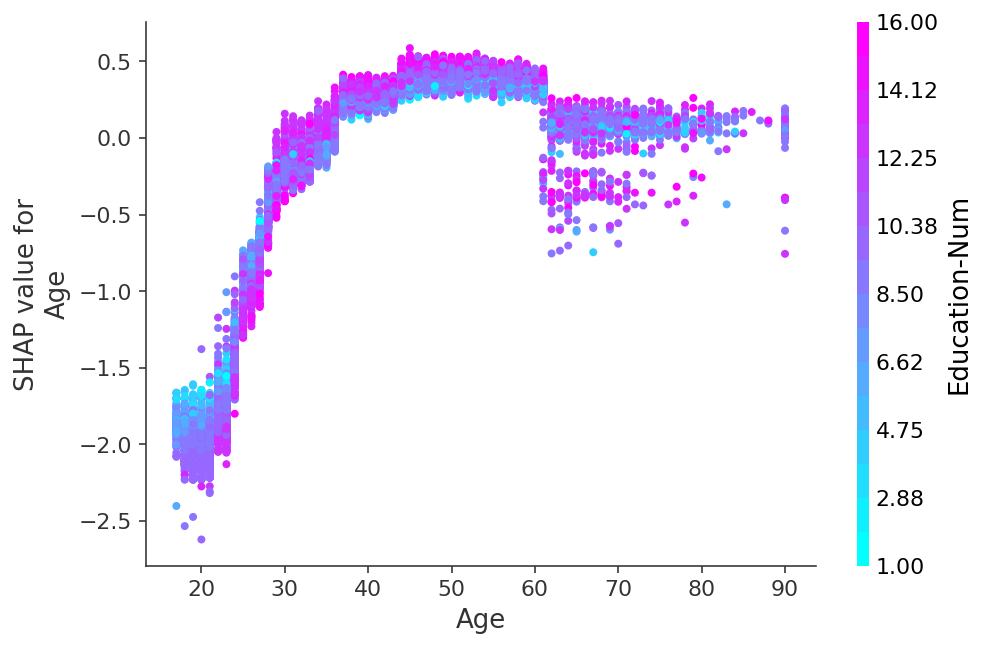

In [10]:
import matplotlib.pyplot as plt

# you can use the cmap parameter to provide your own custom color map
shap.dependence_plot("Age", shap_values, X, cmap=plt.get_cmap("cool"))

## Customizing the figure properties

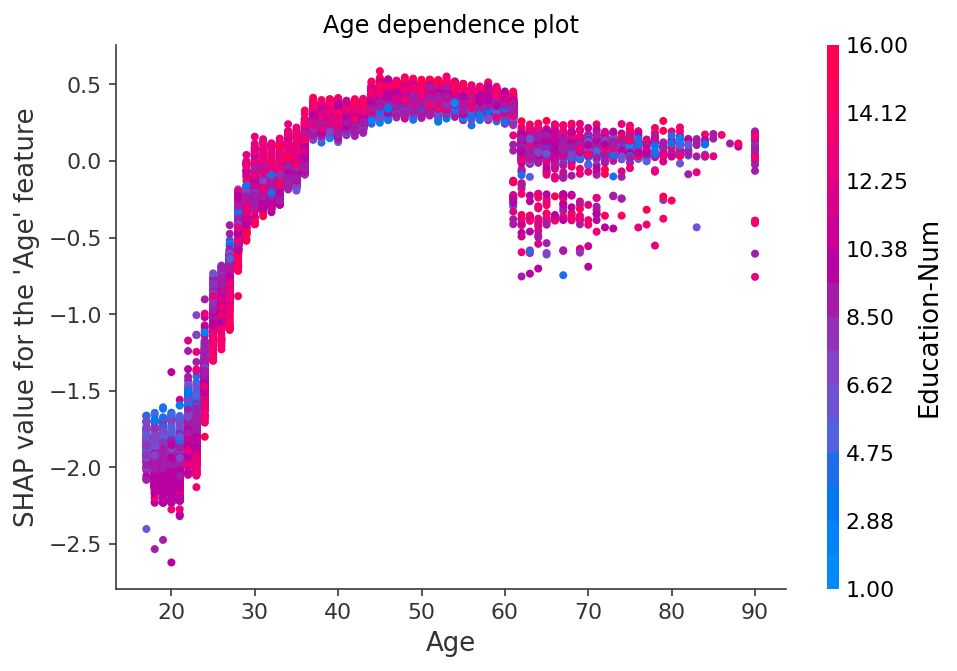

In [12]:
# by passing show=False you can prevent shap.dependence_plot from calling
# the matplotlib show() function, and so you can keep customizing the plot
# before eventually calling show yourself
shap.dependence_plot(0, shap_values, X, show=False)
plt.title("Age dependence plot")
plt.ylabel("SHAP value for the 'Age' feature")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

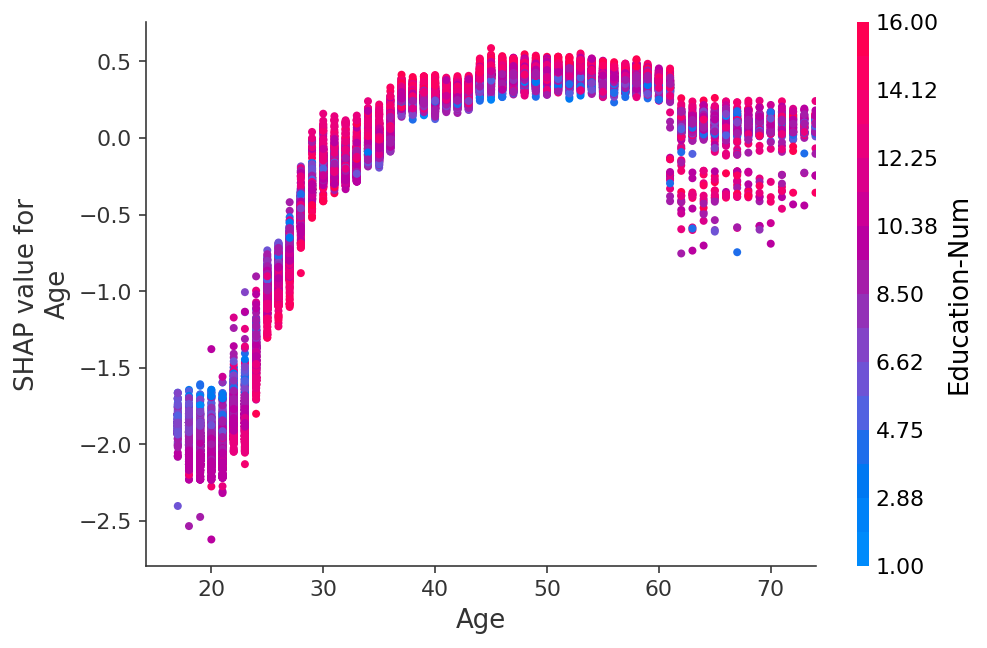

In [13]:
# you can use xmax and xmin with a percentile notation to hide outliers
shap.dependence_plot(0, shap_values, X, xmin="percentile(1)", xmax="percentile(99)")

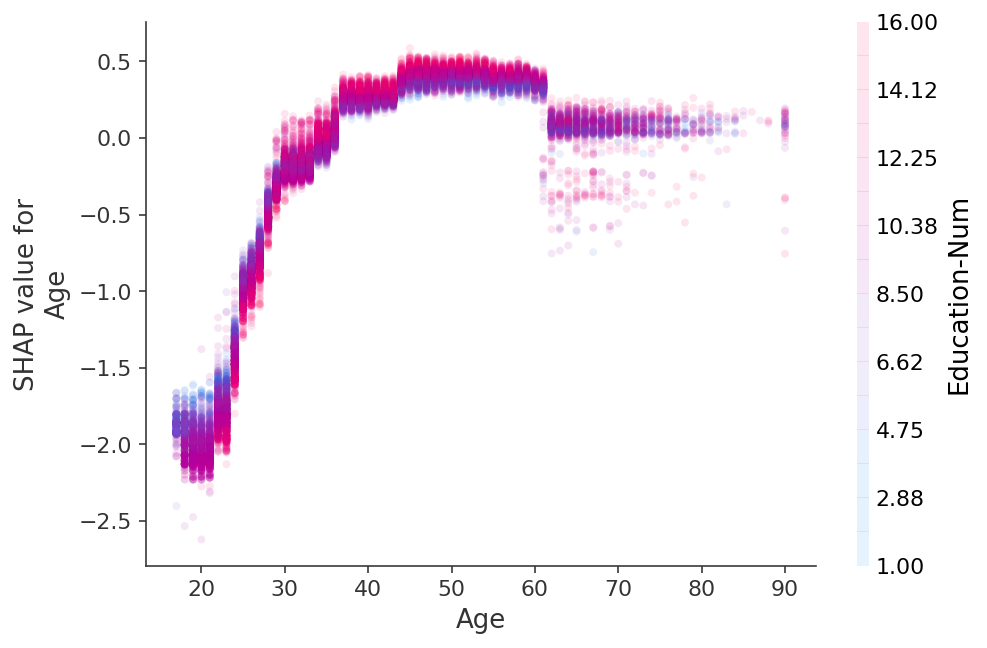

In [14]:
# transparency can help reveal dense vs. sparse areas of the scatter plot
shap.dependence_plot(0, shap_values, X, alpha=0.1)

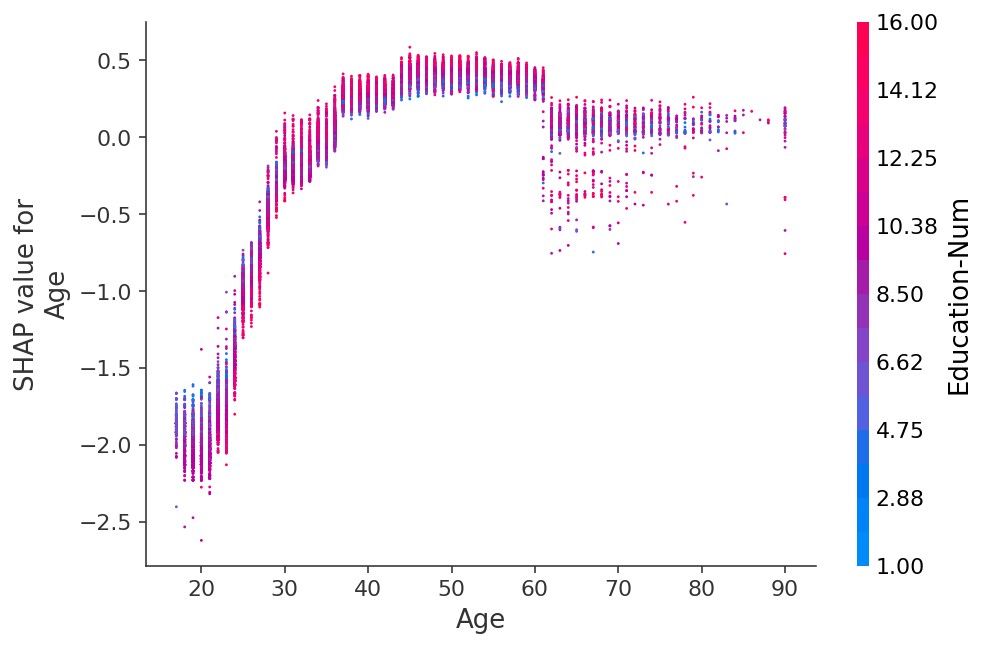

In [15]:
# an alternative to transparency is to reduce the dot size
shap.dependence_plot(0, shap_values, X, dot_size=2)

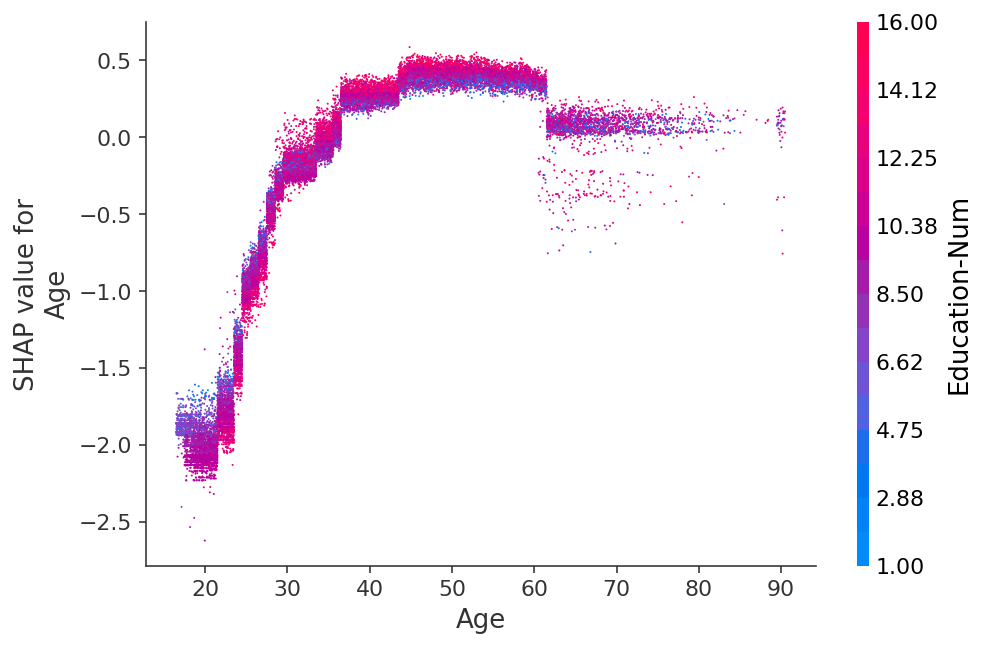

In [16]:
# for categorical (or binned) data adding a small amount of x-jitter makes
# thin columns of dots more readable
shap.dependence_plot(0, shap_values, X, x_jitter=1, dot_size=1)

## Using string categorical features

In [109]:
X_cat = X.copy()
relationship_decoding = {
    0: 'Not-in-family',
    1: 'Unmarried',
    2: 'Other-relative',
    3: 'Own-child',
    4: 'Husband',
    5: 'Wife'
}
X_cat["Relationship"] = X_cat["Relationship"].map(relationship_decoding)

X_cat.head(3)

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,Not-in-family,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,Husband,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,Not-in-family,4,1,0.0,0.0,40.0,39


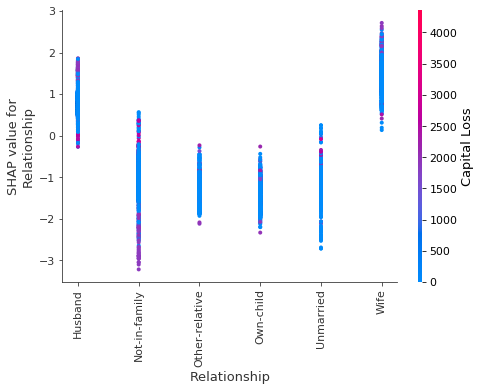

In [108]:
# You can use string-valued category features
shap.dependence_plot("Relationship", shap_values, X_cat)

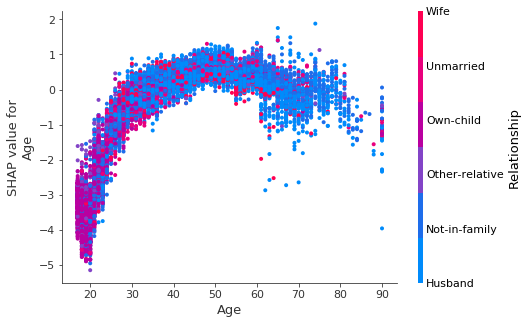

In [107]:
# It is also possible to use string-valued features to plot interaction effect
shap.dependence_plot(0, shap_values, X_cat, interaction_index="Relationship")

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 